# week05

## Linechart

In [7]:
import pandas as pd

download_url = (
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"
)

df = pd.read_csv(download_url)

<class 'pandas.core.frame.DataFrame'>
(173, 21)


In [9]:
# info regarding data
print( type(df) )
print( df.shape )
print( df.columns )

<class 'pandas.core.frame.DataFrame'>
(173, 21)
Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')


In [14]:
# more info - a bad visualization
df.head

<bound method NDFrame.head of      Rank  Major_code                                      Major    Total  \
0       1        2419                      PETROLEUM ENGINEERING   2339.0   
1       2        2416             MINING AND MINERAL ENGINEERING    756.0   
2       3        2415                  METALLURGICAL ENGINEERING    856.0   
3       4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4       5        2405                       CHEMICAL ENGINEERING  32260.0   
..    ...         ...                                        ...      ...   
168   169        3609                                    ZOOLOGY   8409.0   
169   170        5201                     EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                        CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                      COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                            LIBRARY SCIENCE   1098.0   

         Men    Women            Major_catego

In [18]:
# a better one is df.head()
pd.set_option("display.max.columns", None) # just to ensure no column is hidden
pd.set_option("display.max.rows", None) # just to ensure no row is hidden

df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [ ]:
# The %matplotlib magic command sets up your Jupyter Notebook for displaying plots with Matplotlib
# The standard Matplotlib graphics backend is used by default
%matplotlib

In [19]:
# being sure no repeat in Major columns
df[['Major']].nunique()

Major    173
dtype: int64

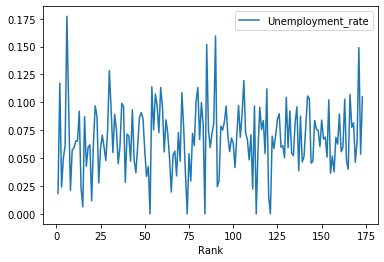

In [21]:
import matplotlib.pyplot as plt
df.plot(x="Rank", y="Unemployment_rate")
plt.show()

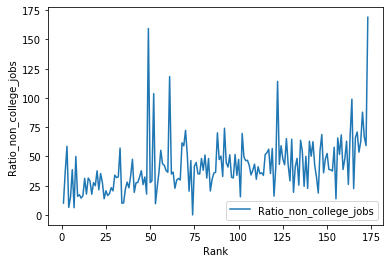

In [41]:
df["Ratio_non_college_jobs"] = df["Non_college_jobs"]/df["Sample_size"]
df.plot(x="Rank", y="Ratio_non_college_jobs")
plt.xlabel('Rank')
plt.ylabel('Ratio_non_college_jobs')
plt.show()

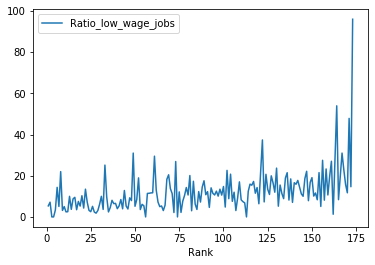

In [42]:
df["Ratio_low_wage_jobs"] = df["Low_wage_jobs"]/df["Sample_size"]
df.plot(x="Rank", y="Ratio_low_wage_jobs")
plt.show()

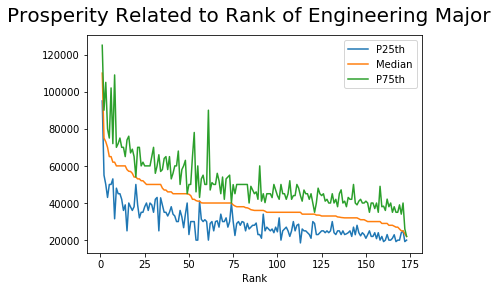

In [44]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])
plt.suptitle('Prosperity Related to Rank of Engineering Major', fontsize=20)
plt.show()

## Scatter plot


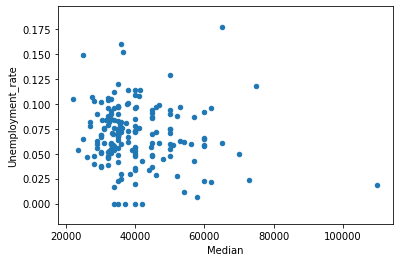

In [66]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

## Histogram

In [46]:
median_column = df["Median"]

type(median_column)

pandas.core.series.Series

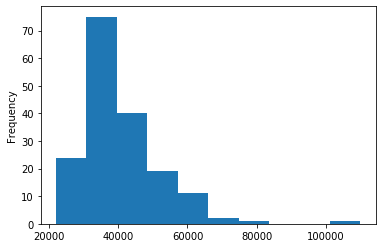

In [47]:
median_column.plot(kind="hist")

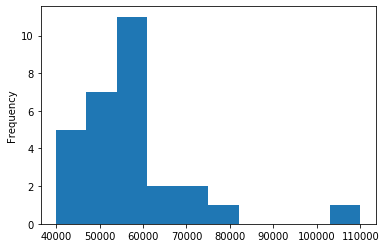

In [74]:
# histogram of a sub category
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")

## Barchart

In [54]:
# get top 5 instances in the base dataframe
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Ratio_low_wage_jobs,Ratio_non_college_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193,5.361111,10.111111
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50,7.142857,36.714286
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0,0.000000,58.666667
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0,0.000000,6.375000
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972,3.363322,15.363322


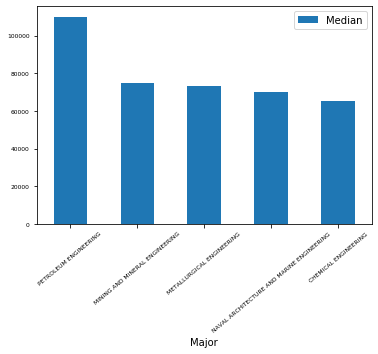

In [64]:
# bar chart
top_5.plot(x="Major", y="Median", kind="bar", rot=40, fontsize=6) # rotation and fontsize are for xlabels

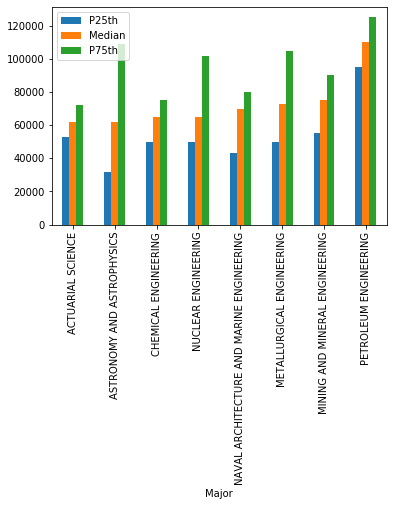

In [65]:
# multiple bars
top_medians = df[df["Median"] > 60000].sort_values("Median")

top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

## Horizontal barchart

In [71]:
#checking total number of students in each category of majors
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()

# casting the series type to integer
print( cat_totals.astype(int) )

Major_category
Interdisciplinary                        12296
Agriculture & Natural Resources          75620
Law & Public Policy                     179107
Physical Sciences                       185479
Industrial Arts & Consumer Services     229792
Computers & Mathematics                 299008
Arts                                    357130
Communications & Journalism             392601
Biology & Life Science                  453862
Health                                  463230
Psychology & Social Work                481007
Social Science                          529966
Engineering                             537583
Education                               559129
Humanities & Liberal Arts               713468
Business                               1302376
Name: Total, dtype: int32


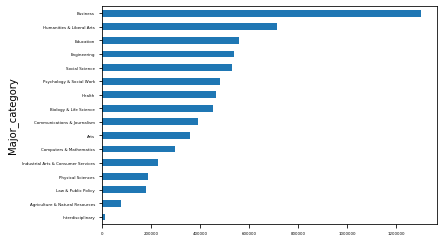

In [72]:
cat_totals.plot(kind="barh", fontsize=4)

## Pie chart

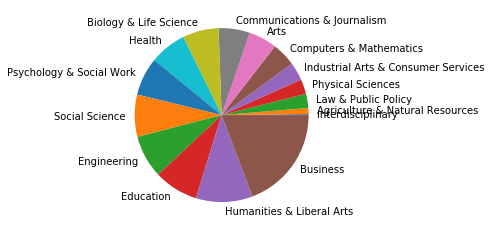

In [76]:
cat_totals.plot(kind="pie", label="")

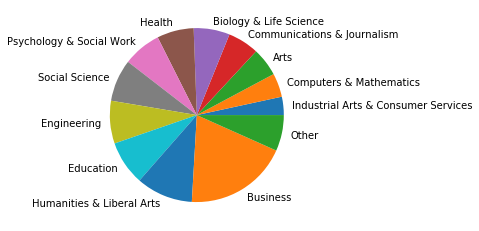

In [79]:
# pie chart with "other" category
small_cat_totals = cat_totals[cat_totals < 200_000]

big_cat_totals = cat_totals[cat_totals > 200_000]

# Adding a new item "Other" with the sum of the small categories

small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

big_cat_totals = big_cat_totals.append(small_sums)

big_cat_totals.plot(kind="pie", label="")
